In [19]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from PIL import Image
import os

%matplotlib inline

In [20]:
def change_color(img, source_colors, target_colors):
    canvas = img.copy()
    
    for i in range(len(source_colors)):
        src = source_colors[i]
        trg = target_colors[i]
        print(img.shape)
        mask = np.all(img == src, axis=-1)
        canvas[mask] = trg
    return canvas

def src_num_to_color(num):
    if isinstance(num, list):
        num = num[0]

    if num == 0:
        color = (200, 200, 200)
    elif num == 1:
        color = (255, 0, 0)
    elif num == 2:
        color = (255, 255, 0)
    elif num == 3:
        color = (0, 255, 0)
    elif num == 4:
        color = (0, 255, 255)
    elif num == 5:
        color = (0, 0, 255)
    elif num == 6:
        color = (255, 0, 255)
    elif num == 7:
        color = (128, 0, 0)
    elif num == 8:
        color = (128, 128, 0)
    elif num == 9:
        color = (0, 128, 0)
    elif num == 10:
        color = (0, 0, 128)
    elif num == 11:
        color = (64, 64, 64)
    else:
        sys.exit("invalid number:" + str(num))
    return color

In [38]:
img_dir = "../ipynb/input_predmap/"

wsi = "03_G291"
img1_path = img_dir + f"S_cv2_{wsi}.png" 
img2_path = img_dir + f"ST_03_G144_cv2_{wsi}.png"
img3_path = img_dir + f"{wsi}_overlaid.tif"

img_path_list = [img1_path, img2_path, img3_path]

output_dir = "../ipynb/output_predmap/"
ext = ".png"

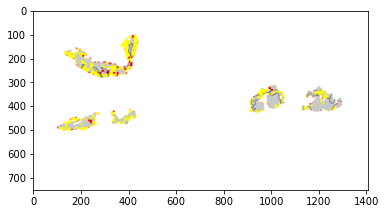

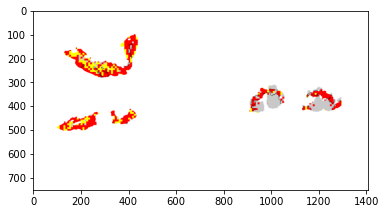

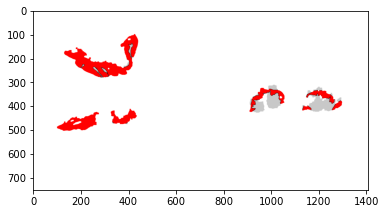

(752, 1408, 3)


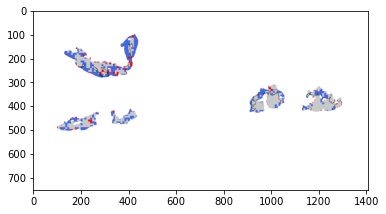

(752, 1408, 3)


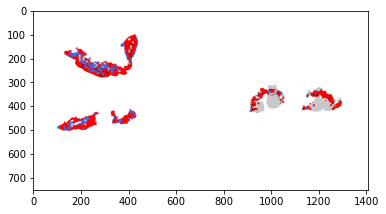

(752, 1408, 3)


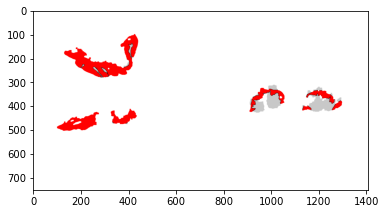

In [39]:
source_colors = [(255, 255, 0)]
target_colors = [(65, 105, 225)] #4169e1 (LSIL用)

for idx in range(len(img_path_list)):
    img = cv2.imread(img_path_list[idx])  # BGR
    #画像の表示
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # OpenCV は色がGBR順なのでRGB順に並べ替える
    plt.show()
    
for idx in range(len(img_path_list)):
    img_path = img_path_list[idx]
    img = cv2.imread(img_path)  # BGR
    bf_img = cv2.cvtColor(img.copy(), cv2.COLOR_BGR2RGB)  # RGBに変換
    af_img = change_color(bf_img, source_colors, target_colors)  # RGB

    img_name = os.path.splitext(os.path.basename(img_path))[0]
    output_path = output_dir + img_name + ext
    cv2.imwrite(output_path, cv2.cvtColor(af_img, cv2.COLOR_RGB2BGR))
    
    #画像の表示
    plt.imshow(af_img)
    plt.show()